<a href="https://colab.research.google.com/github/LinAhmed/ML_Ma_Camp_Opt/blob/main/GENERALPIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#convert Totalcharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.dropna(inplace=True)

In [ ]:
ID = df['customerID'].copy()

In [ ]:
#thiiiiis
df.drop(columns=['customerID'], inplace=True)

In [ ]:
# No Nulls / No duplicates
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
pd.set_option('display.float_format', lambda x : '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7032.000,32.422,24.545,1.000,9.000,29.000,55.000,72.000
MonthlyCharges,7032.000,64.798,30.086,18.250,35.587,70.350,89.862,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


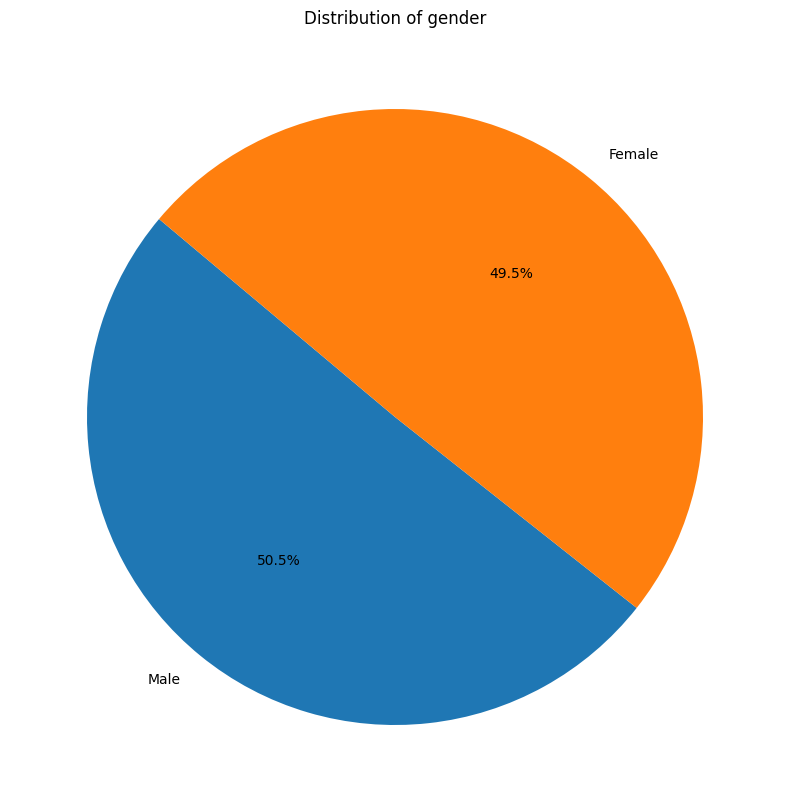

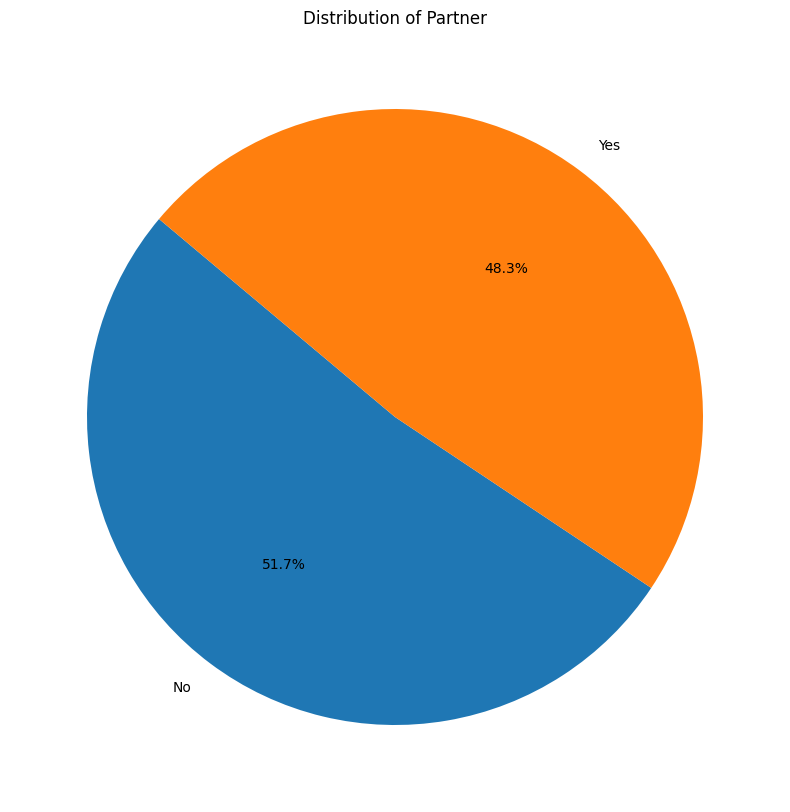

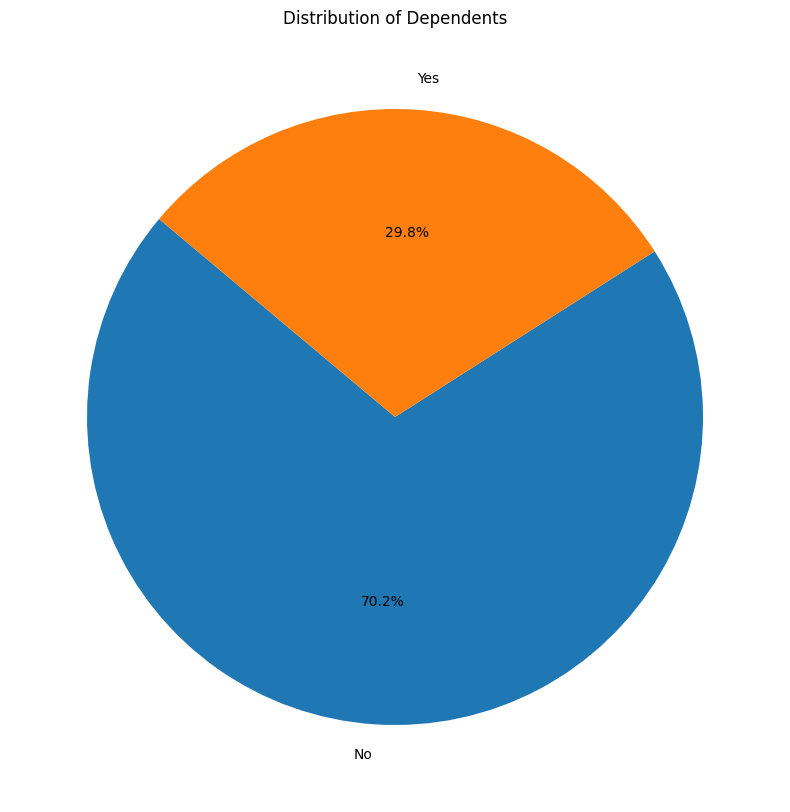

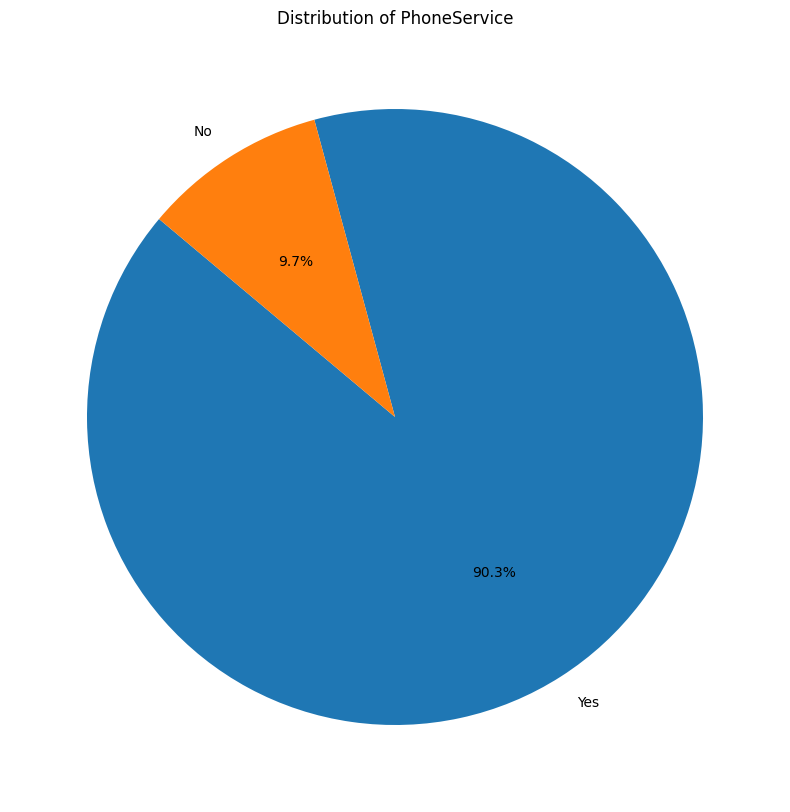

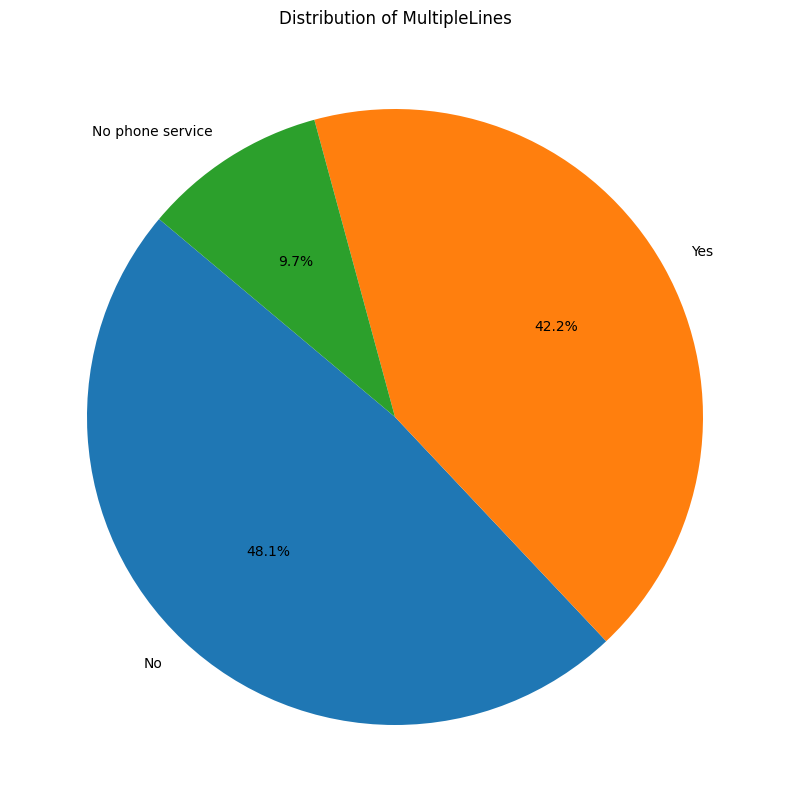

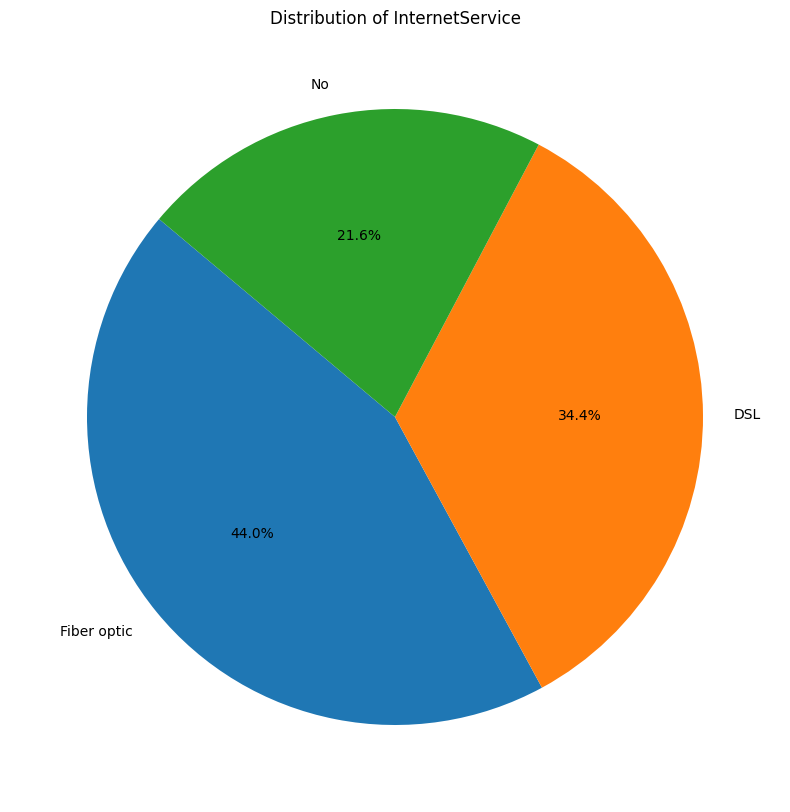

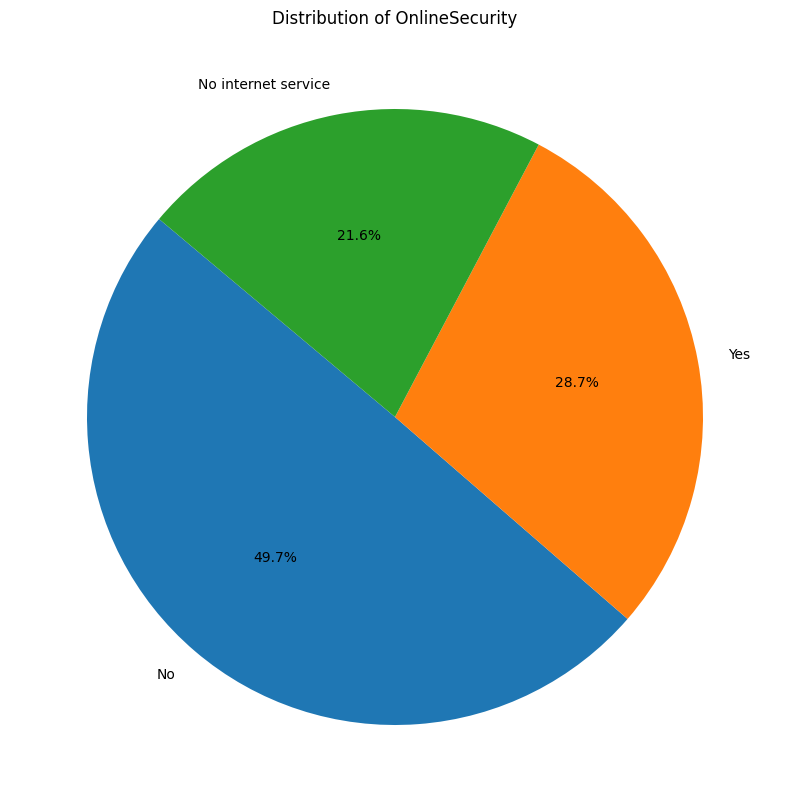

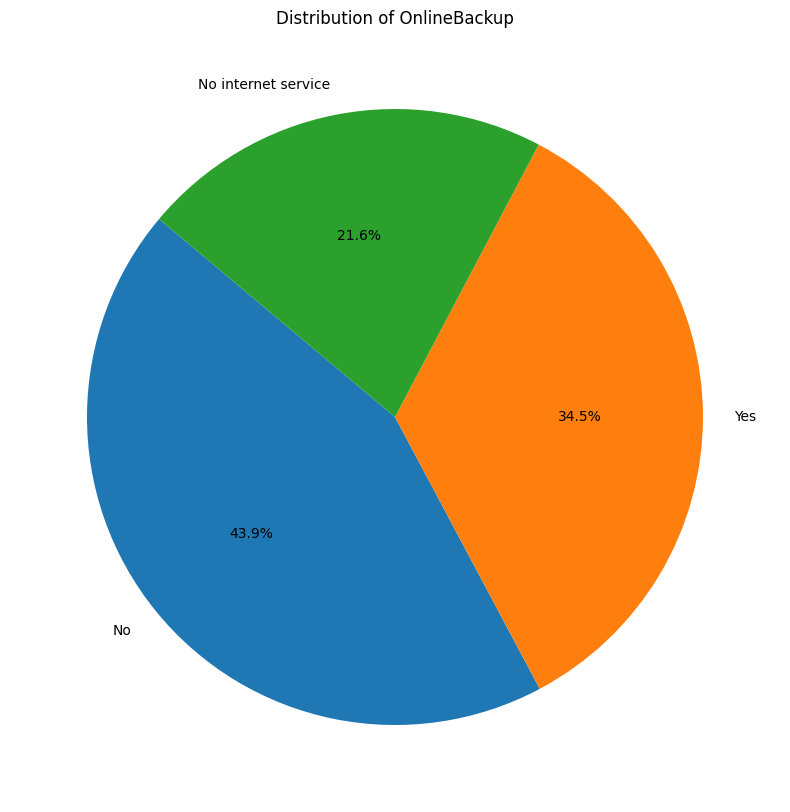

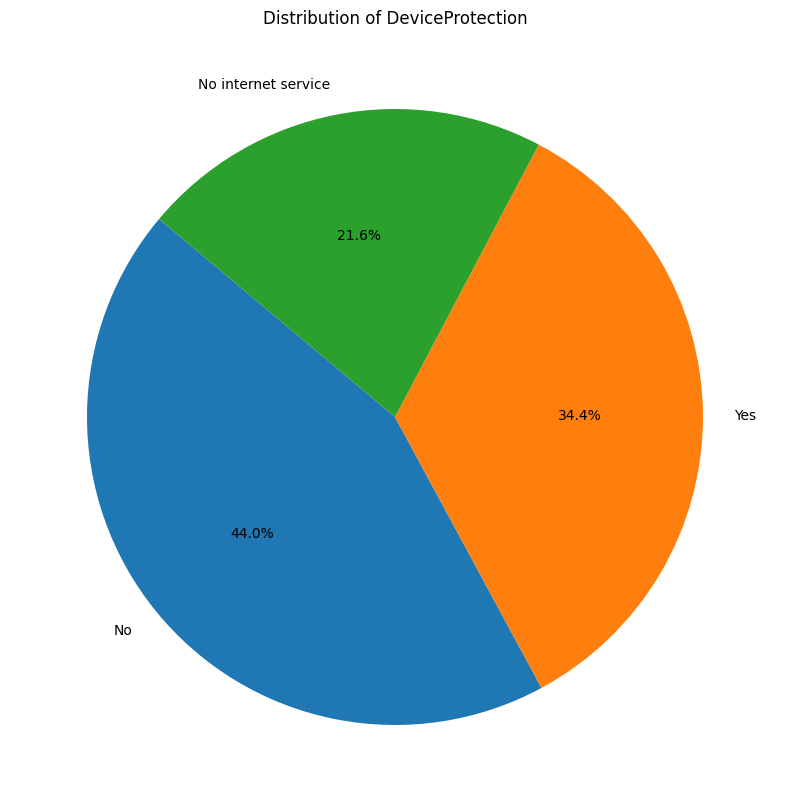

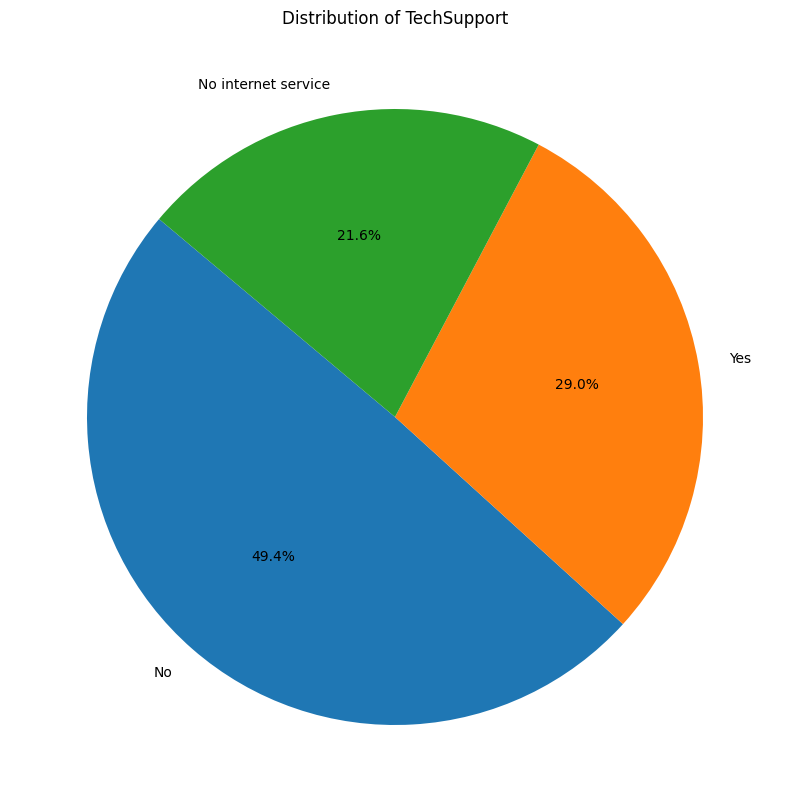

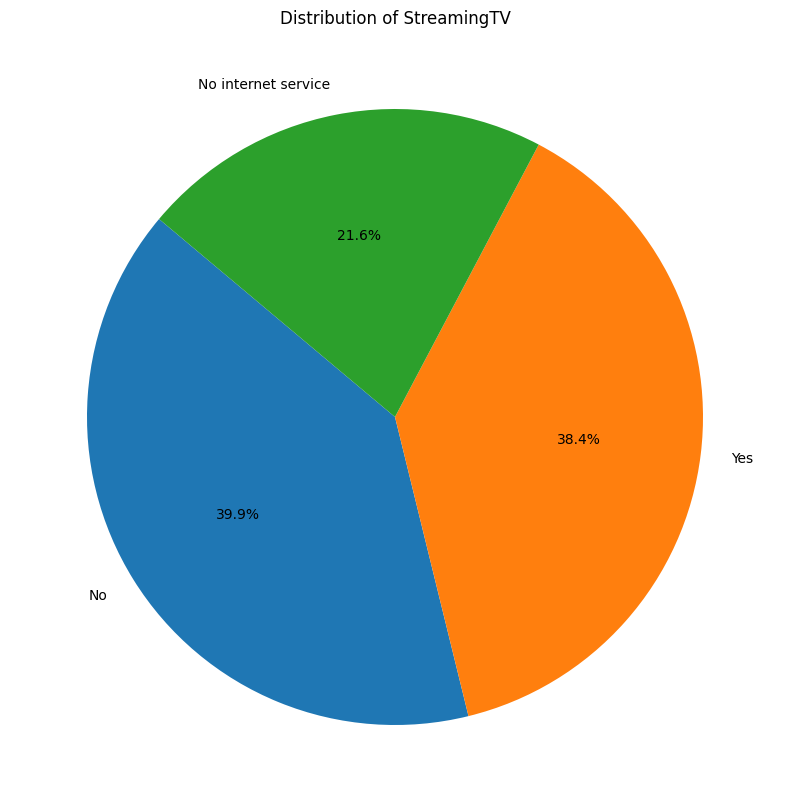

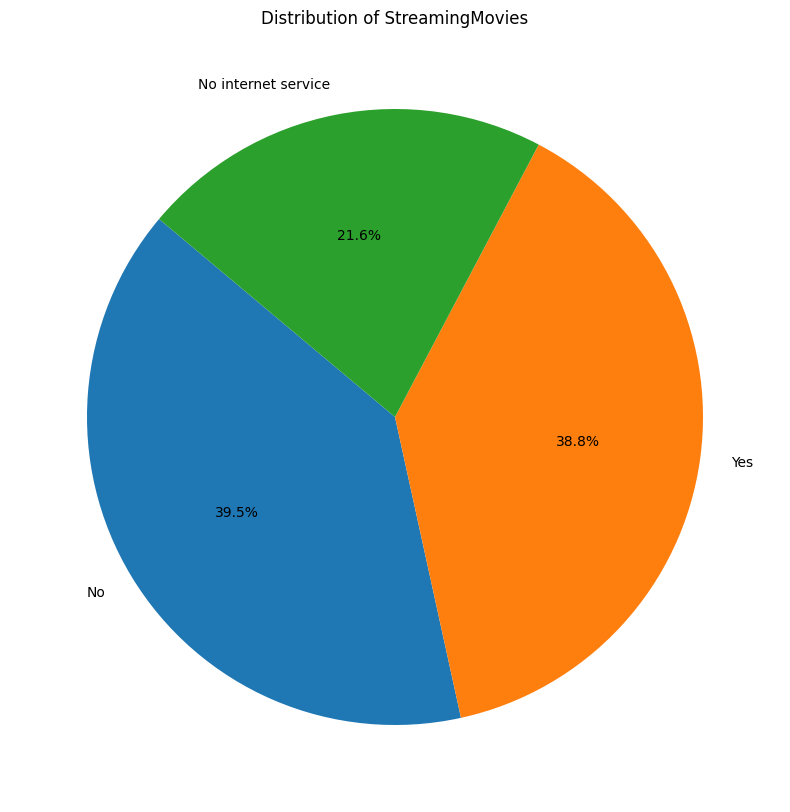

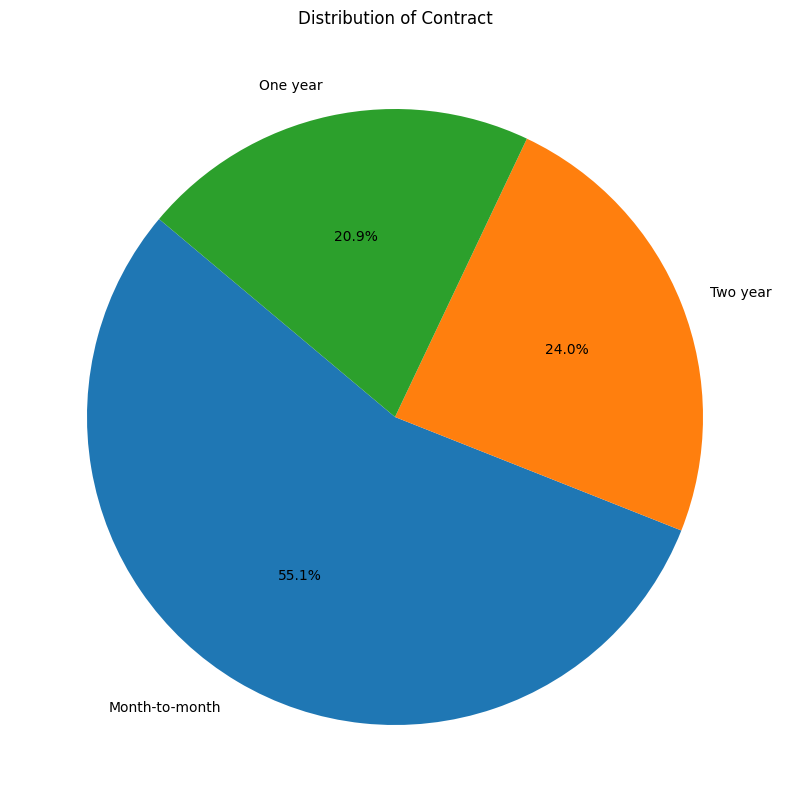

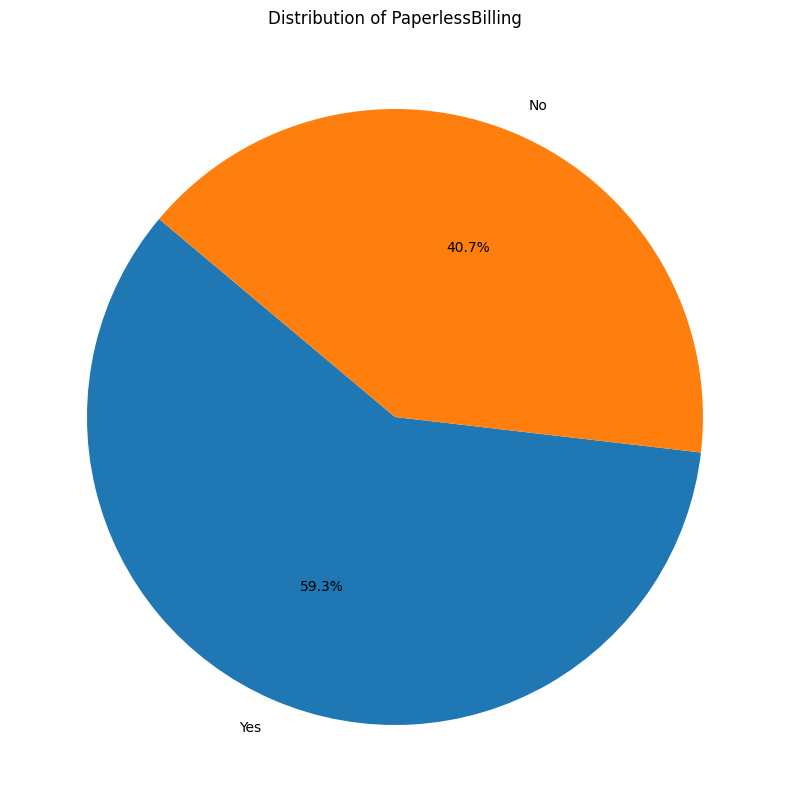

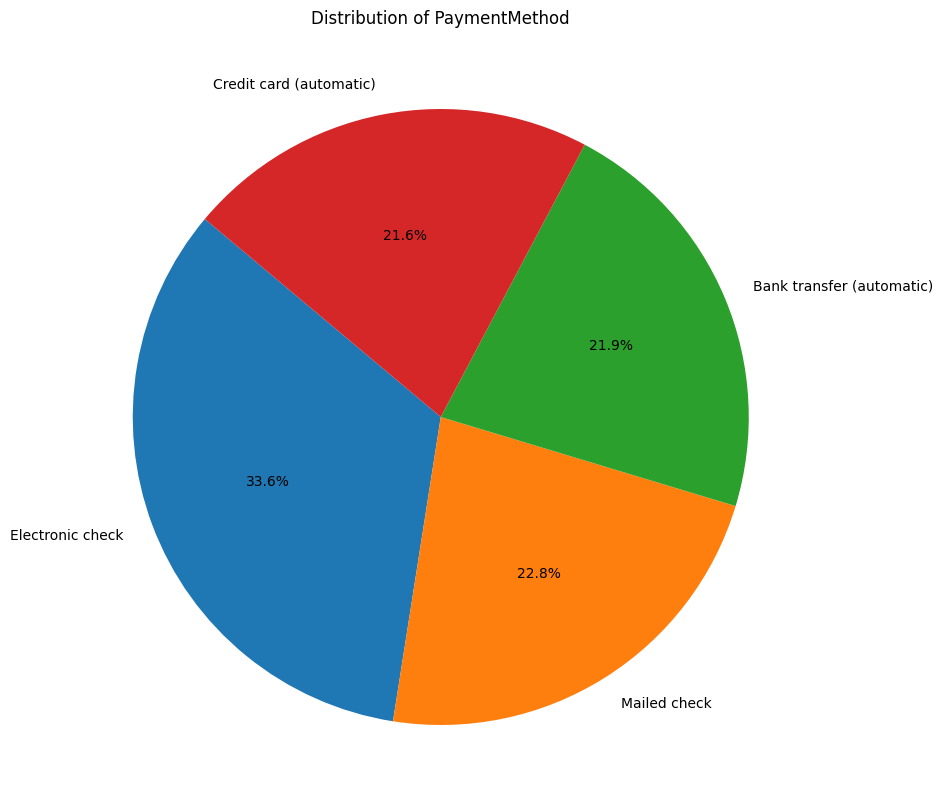

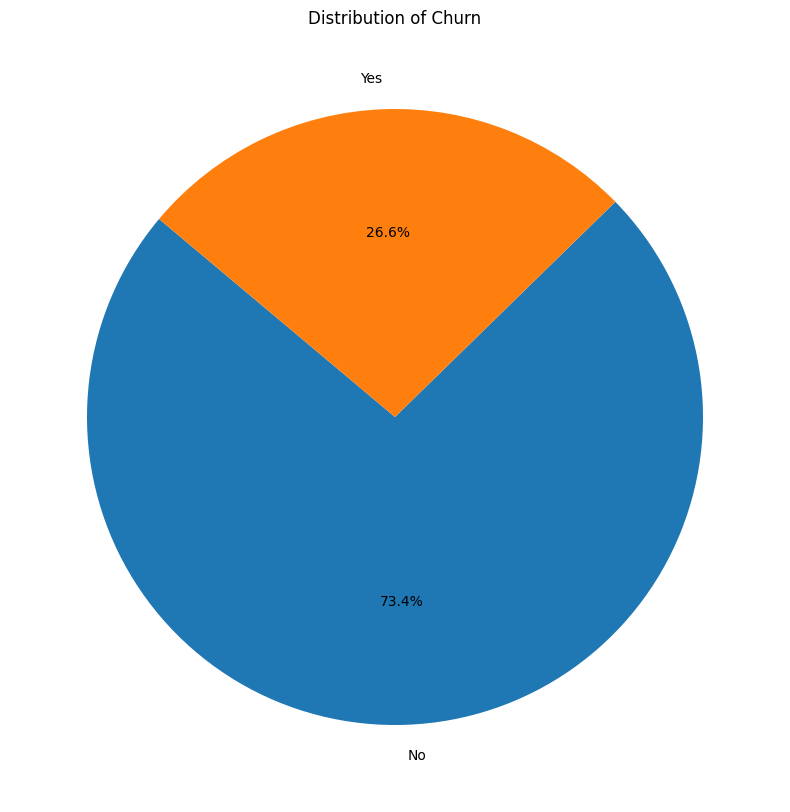

In [ ]:
# Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns
# Numerical Features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot pie charts for each categorical column
for col in cat_cols:
    # Calculate the distribution
    distribution = df[col].value_counts()
    plt.figure(figsize=(10, 10))
    plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {col}')
    plt.show()

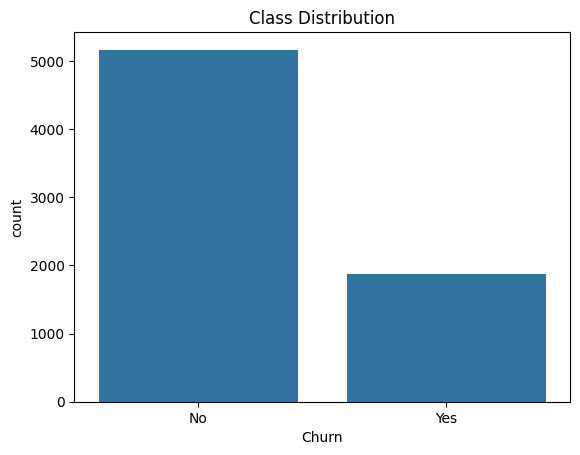

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Class Distribution')
plt.show()

In [ ]:
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for feature in cat_cols:
    df[feature] = df[feature].fillna('Missing')
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

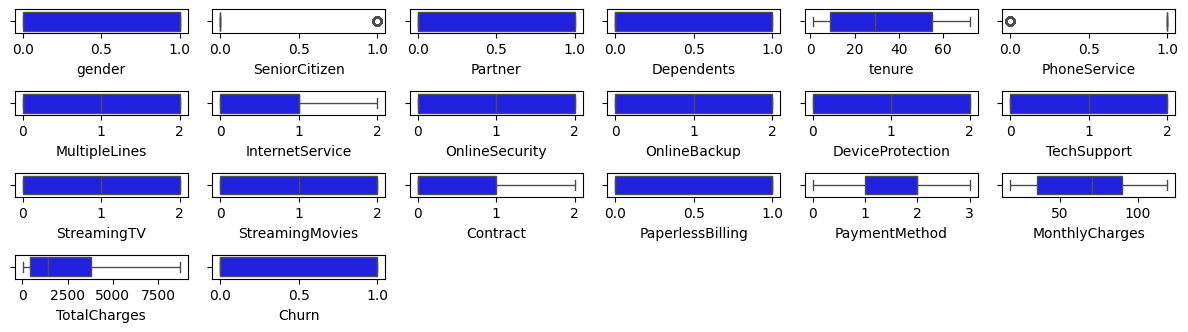

In [ ]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(df):
    plt.subplot(15, 6, i+1)
    sns.boxplot(x=df[col], color='blue')

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(7032, 20)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1500, C=1.0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=20, weights='distance', metric='manhattan'),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, min_samples_split=20, min_samples_leaf=10),
    'Random Forest': RandomForestClassifier(n_estimators=1500, class_weight='balanced', max_depth=5, min_samples_split=20),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, subsample=0.8),
    'XGBoost': XGBClassifier(max_depth=8 ),
    'LightGBM': LGBMClassifier(max_depth=8),
    'CatBoost': CatBoostClassifier(learning_rate=0.05, iterations=2000, depth=8, verbose=0),
}

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
#Print calssification report for each model
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Apply SMOTE-ENN to the training data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


for model_name, model in models.items():
    # Train the model with resampled data
    model.fit(X_resampled, y_resampled)

    # Make predictions on the test set (un-resampled)
    y_pred = model.predict(X_test)

    # Print the classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       517
           1       0.48      0.73      0.58       187

    accuracy                           0.72       704
   macro avg       0.68      0.72      0.68       704
weighted avg       0.77      0.72      0.73       704


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       517
           1       0.46      0.79      0.58       187

    accuracy                           0.69       704
   macro avg       0.68      0.72      0.67       704
weighted avg       0.78      0.69      0.71       704


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       517
           1       0.48      0.74      0.58       187

    accuracy                           0.7

In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print feature importance as a formatted table
print(feature_importance.to_string(index=False))


         Feature  Importance
          tenure      15.684
  MonthlyCharges      15.347
    TotalCharges      12.087
        Contract       6.830
   PaymentMethod       5.527
   MultipleLines       5.094
    OnlineBackup       4.568
 InternetService       4.556
          gender       4.438
  OnlineSecurity       4.283
     TechSupport       4.132
     StreamingTV       3.986
 StreamingMovies       3.482
DeviceProtection       2.679
PaperlessBilling       2.106
      Dependents       1.744
         Partner       1.727
   SeniorCitizen       0.993
    PhoneService       0.737


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTEENN
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionaries to store evaluation metrics
metrics = {model_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for model_name in models}

print("Evaluation with StratifiedKFold:\n")

# Loop through each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Initialize lists to store metrics for each fold
    acc, prec, rec, f1 = [], [], [], []

    # Perform cross-validation
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply resampling to the training data only
        smoteenn = SMOTEENN(random_state=42)
        X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

        # Train the model
        model.fit(X_resampled, y_resampled)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        acc.append(accuracy_score(y_test, y_pred))
        prec.append(precision_score(y_test, y_pred, average='weighted', zero_division=1))
        rec.append(recall_score(y_test, y_pred, average='weighted', zero_division=1))
        f1.append(f1_score(y_test, y_pred, average='weighted', zero_division=1))

    # Store the average scores for this model
    metrics[model_name]['accuracy'] = np.mean(acc)
    metrics[model_name]['precision'] = np.mean(prec)
    metrics[model_name]['recall'] = np.mean(rec)
    metrics[model_name]['f1'] = np.mean(f1)

    print(f"{model_name}:")
    print(f"  Accuracy: {metrics[model_name]['accuracy']:.4f}")
    print(f"  Precision: {metrics[model_name]['precision']:.4f}")
    print(f"  Recall: {metrics[model_name]['recall']:.4f}")
    print(f"  F1 Score: {metrics[model_name]['f1']:.4f}")
    print()


Evaluation with StratifiedKFold:

Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Logistic Regression:
  Accuracy: 0.7499
  Precision: 0.7993
  Recall: 0.7499
  F1 Score: 0.7623

Evaluating K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

K-Nearest Neighbors:
  Accuracy: 0.6898
  Precision: 0.7740
  Recall: 0.6898
  F1 Score: 0.7076

Evaluating Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Decision Tree:
  Accuracy: 0.7371
  Precision: 0.7902
  Recall: 0.7371
  F1 Score: 0.7504

Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Random Forest:
  Accuracy: 0.7437
  Precision: 0.8033
  Recall: 0.7437
  F1 Score: 0.7574

Evaluating Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Gradient Boosting:
  Accuracy: 0.7516
  Precision: 0.7943
  Recall: 0.7516
  F1 Score: 0.7631

Evaluating XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

XGBoost:
  Accuracy: 0.7523
  Precision: 0.7885
  Recall: 0.7523
  F1 Score: 0.7629

Evaluating LightGBM...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Number of positive: 2535, number of negative: 2144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4679, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541782 -> initscore=0.167520
[LightGBM] [Info] Start training from score 0.167520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Number of positive: 2573, number of negative: 2116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4689, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548731 -> initscore=0.195545
[LightGBM] [Info] Start training from score 0.195545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Number of positive: 2584, number of negative: 2109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4693, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550607 -> initscore=0.203125
[LightGBM] [Info] Start training from score 0.203125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Number of positive: 2583, number of negative: 2135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4718, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547478 -> initscore=0.190485
[LightGBM] [Info] Start training from score 0.190485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Number of positive: 2533, number of negative: 2138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4671, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542282 -> initscore=0.169534
[LightGBM] [Info] Start training from score 0.169534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM:
  Accuracy: 0.7509
  Precision: 0.7915
  Recall: 0.7509
  F1 Score: 0.7621

Evaluating CatBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

CatBoost:
  Accuracy: 0.7555
  Precision: 0.7904
  Recall: 0.7555
  F1 Score: 0.7658



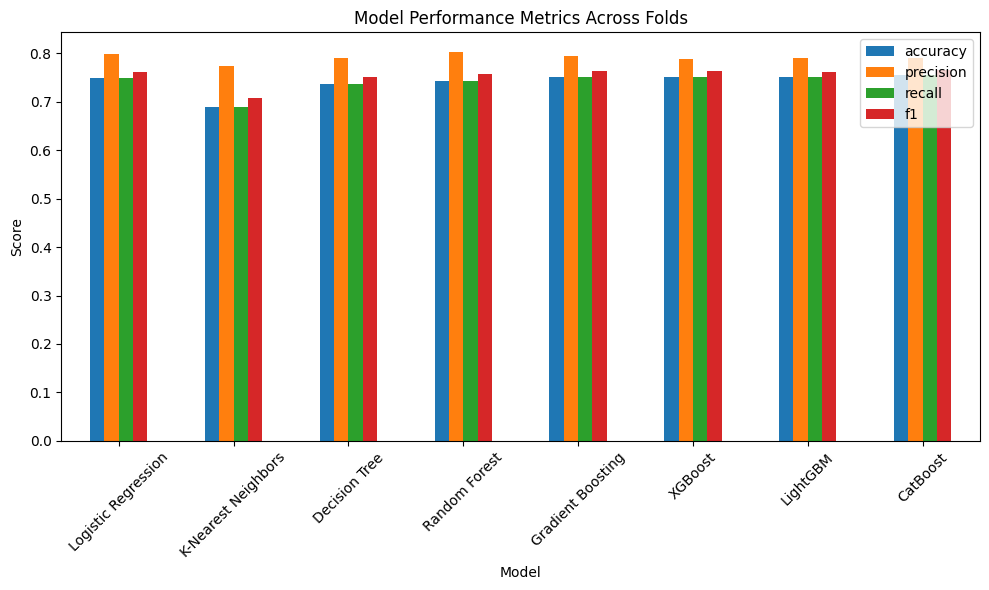

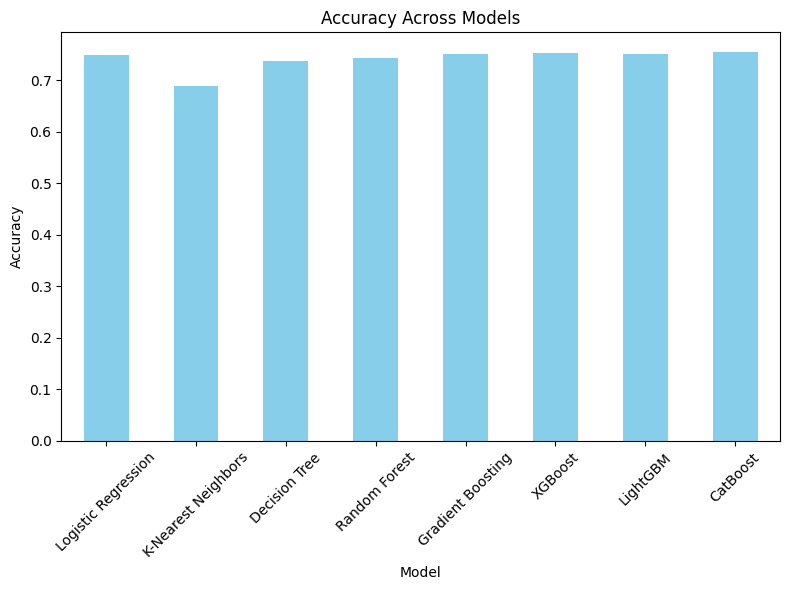

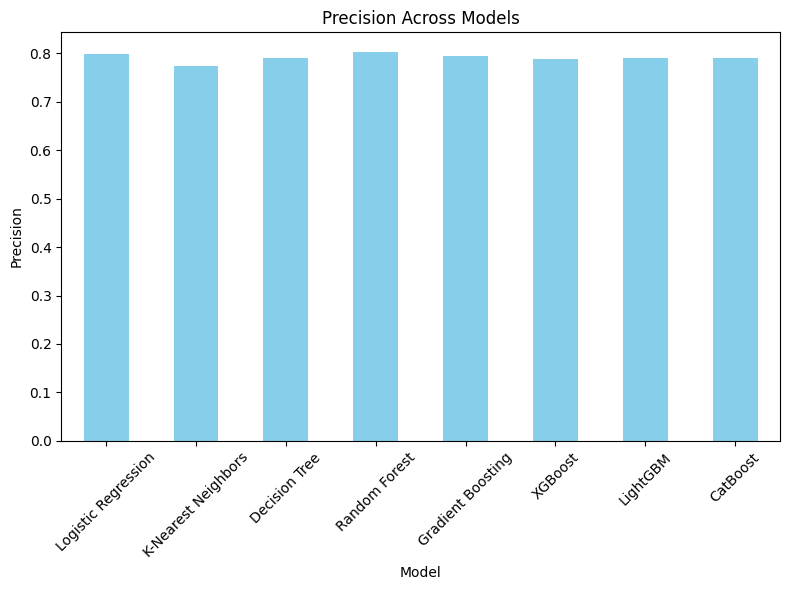

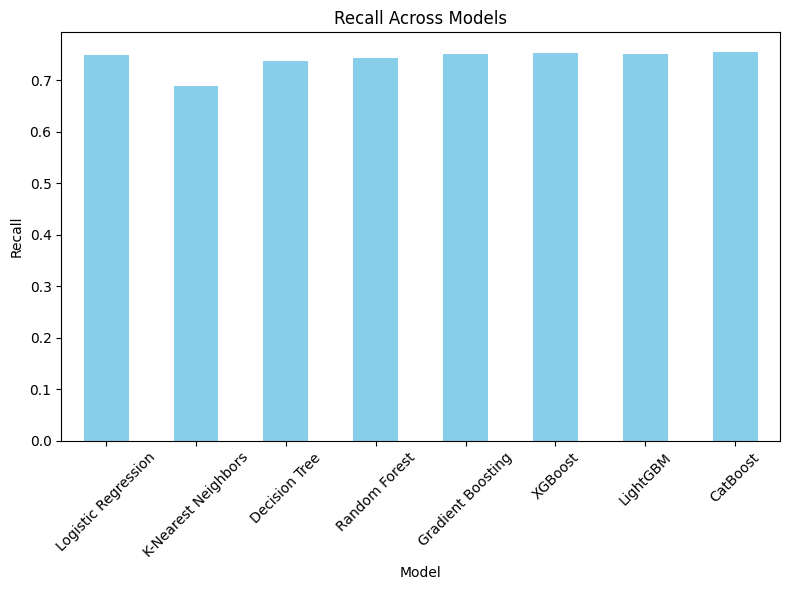

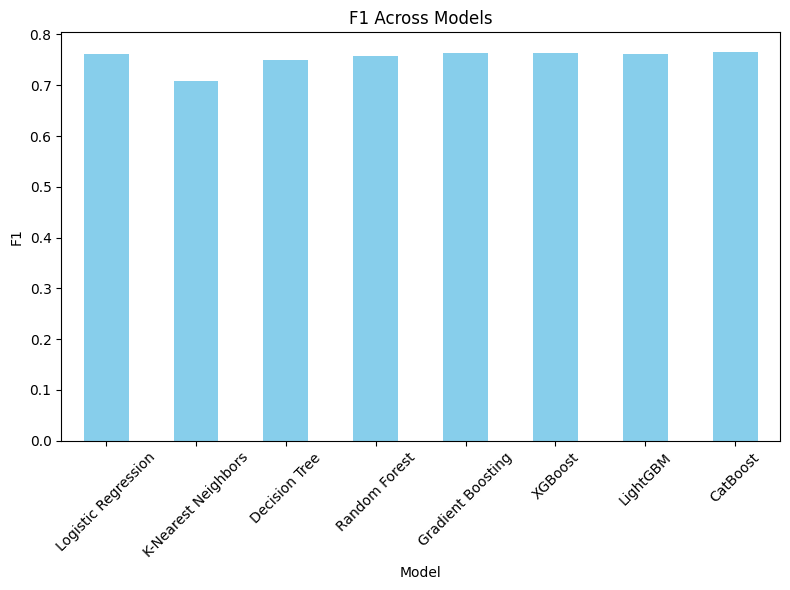

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert metrics dictionary to DataFrame for visualization
metrics_df = {}
for model_name, model_metrics in metrics.items():
    metrics_df[model_name] = model_metrics

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_df).T

# Plot the metrics for all models
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Metrics Across Folds")
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Plot each metric separately for better readability
metrics_list = ['accuracy', 'precision', 'recall', 'f1']

for metric in metrics_list:
    plt.figure(figsize=(8, 6))
    metrics_df[metric].plot(kind='bar', color='skyblue')
    plt.title(f'{metric.capitalize()} Across Models')
    plt.ylabel(f'{metric.capitalize()}')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
best_model = models['CatBoost']
#best_model.fit(X, y)
churn_probabilities = best_model.predict_proba(X_test)[:, 1]  # Probability of Churning
threshold = 0.7
churn_labels = (churn_probabilities >= threshold).astype(int)


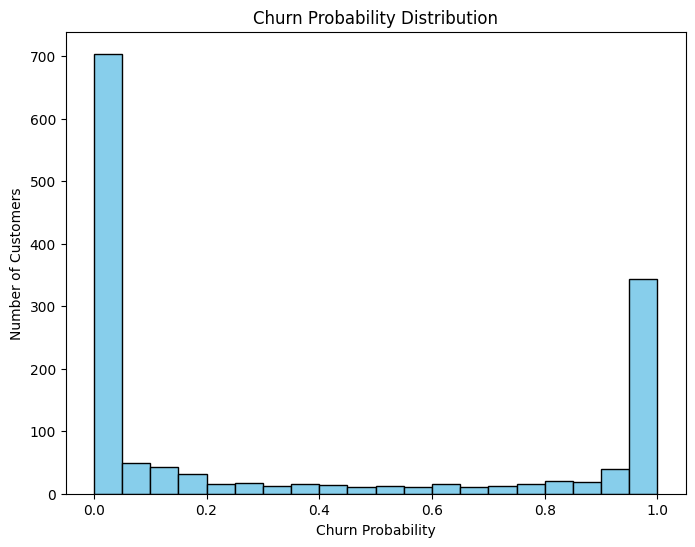

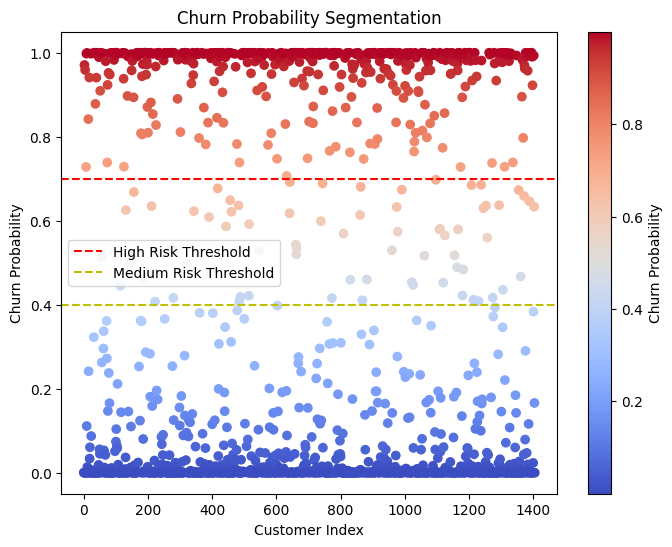

In [ ]:
import matplotlib.pyplot as plt

# Visualize churn probabilities distribution
plt.figure(figsize=(8, 6))
plt.hist(churn_probabilities, bins=20, color='skyblue', edgecolor='black')
plt.title('Churn Probability Distribution')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

# Visualize high, medium, and low-risk segments
plt.figure(figsize=(8, 6))
plt.scatter(range(len(churn_probabilities)), churn_probabilities, c=churn_probabilities, cmap='coolwarm')
plt.axhline(y=0.7, color='r', linestyle='--', label='High Risk Threshold')
plt.axhline(y=0.4, color='y', linestyle='--', label='Medium Risk Threshold')
plt.colorbar(label='Churn Probability')
plt.title('Churn Probability Segmentation')
plt.xlabel('Customer Index')
plt.ylabel('Churn Probability')
plt.legend()
plt.show()



# Clustering

In [ ]:
features_for_clustering = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
X = df[features_for_clustering]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

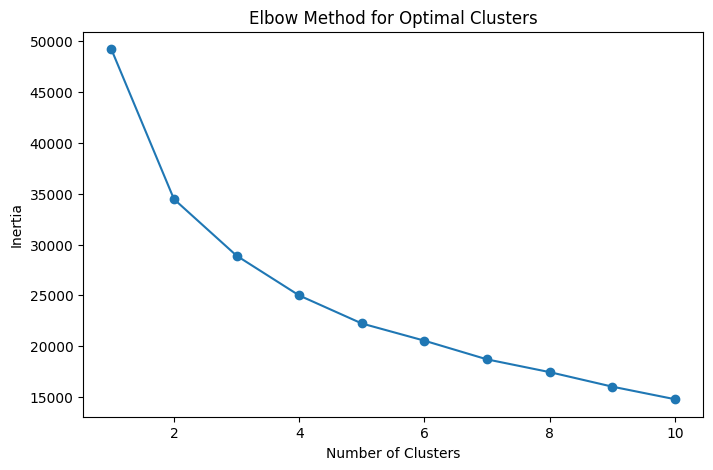

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
optimal_k = 3  # Based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# Analyze the clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
Cluster                                                                     
0         0.512          0.212    0.668       0.330  55.278         0.937   
1         0.499          0.236    0.332       0.177  14.551         0.892   
2         0.504          0.058    0.469       0.381  30.079         0.887   

         MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
Cluster                                                                 
0                1.466            0.671           1.072         1.285   
1                0.893            0.681           0.090         0.537   
2                0.566            1.202           1.183         0.931   

         DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
Cluster                                                                
0                   1.363        1.177        1.682            1.693   
1                   0.520       

In [ ]:
cluster_analysis = df.groupby('Cluster').agg(
    Total_Customers=('Churn', 'count'),
    Churners=('Churn', 'sum'),
    Churn_Percentage=('Churn', lambda x: (x.sum() / x.count()) * 100)
).reset_index()

# Display the results
print(cluster_analysis)

   Cluster  Total_Customers  Churners  Churn_Percentage
0        0             2084       376            18.042
1        1             2321      1200            51.702
2        2             2627       293            11.153


In [ ]:
cluster_feature_analysis = df.groupby('Cluster')[features_for_clustering].mean().reset_index()

# Display the results
print(cluster_feature_analysis)

   Cluster  tenure  MonthlyCharges  TotalCharges  OnlineSecurity  TechSupport  \
0        0  55.278          93.101      5140.368           1.072        1.177   
1        1  14.551          71.409      1054.347           0.090        0.104   
2        2  30.079          36.505      1102.589           1.183        1.106   

   StreamingTV  StreamingMovies  
0        1.682            1.693  
1        0.647            0.647  
2        0.730            0.743  


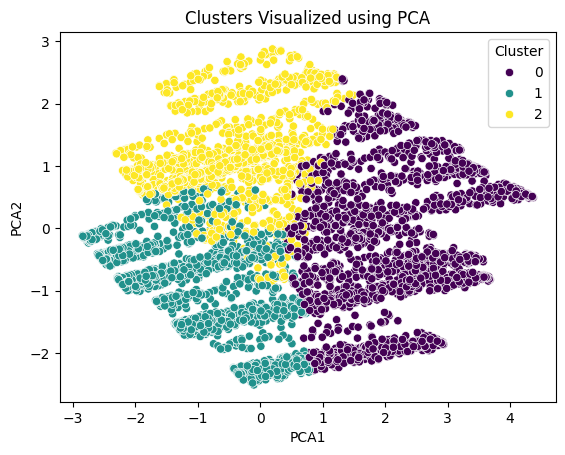

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.show()


In [ ]:
#Based on previous results we can bin each cluster as high, low, medium value customers
# Map clusters to categories
cluster_mapping = {
    0: 'High',
    1: 'Medium',
    2: 'Low'
}

# Apply the mapping to create a new column
df['ClusterCategory'] = df['Cluster'].map(cluster_mapping)

# Display the results
print(df[['Cluster', 'ClusterCategory']].drop_duplicates())



   Cluster ClusterCategory
0        1          Medium
1        2             Low
8        0            High


<ipython-input-37-38fe74f9af6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette="coolwarm")


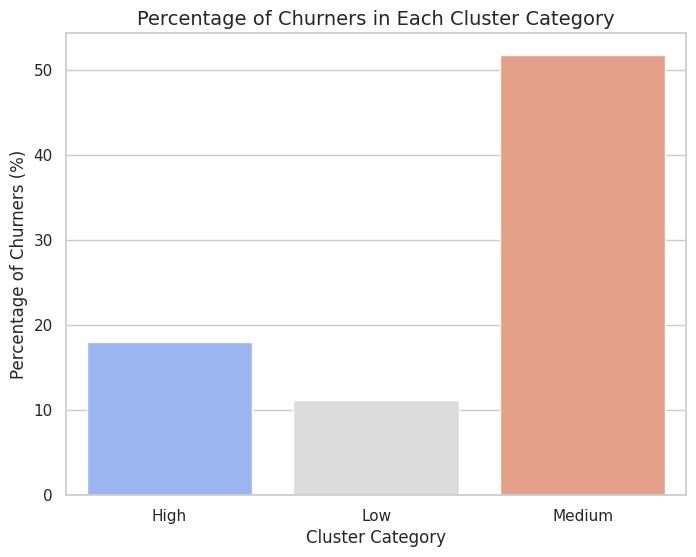

In [ ]:
sns.set_theme(style="whitegrid")
churn_percentage = df.groupby('ClusterCategory')['Churn'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette="coolwarm")
plt.title("Percentage of Churners in Each Cluster Category", fontsize=14)
plt.ylabel("Percentage of Churners (%)")
plt.xlabel("Cluster Category")
plt.show()

<ipython-input-38-657ea2430797>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette="coolwarm")


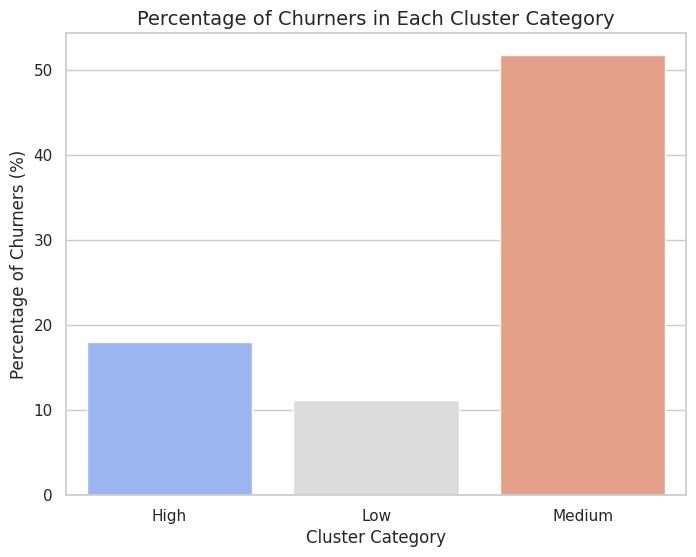

In [ ]:
sns.set_theme(style="whitegrid")

churn_percentage = df.groupby('ClusterCategory')['Churn'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette="coolwarm")
plt.title("Percentage of Churners in Each Cluster Category", fontsize=14)
plt.ylabel("Percentage of Churners (%)")
plt.xlabel("Cluster Category")
plt.show()

<ipython-input-39-c3cffca6bdfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ClusterCategory', y='MonthlyCharges', data=df, palette="viridis")


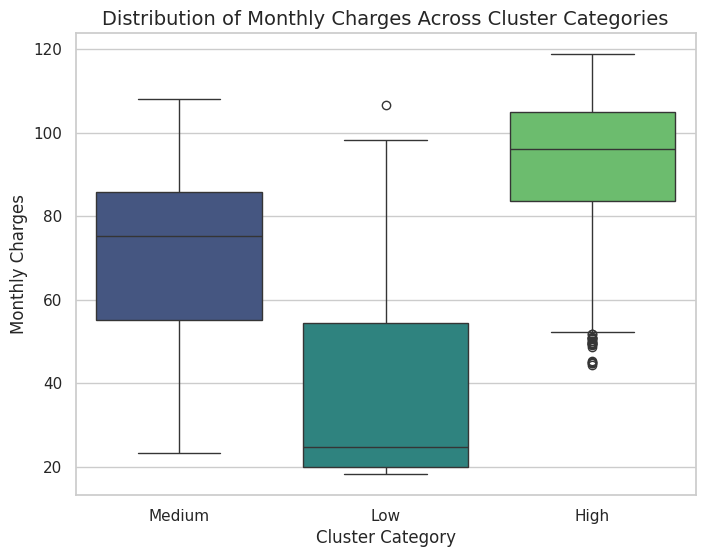

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ClusterCategory', y='MonthlyCharges', data=df, palette="viridis")
plt.title("Distribution of Monthly Charges Across Cluster Categories", fontsize=14)
plt.ylabel("Monthly Charges")
plt.xlabel("Cluster Category")
plt.show()

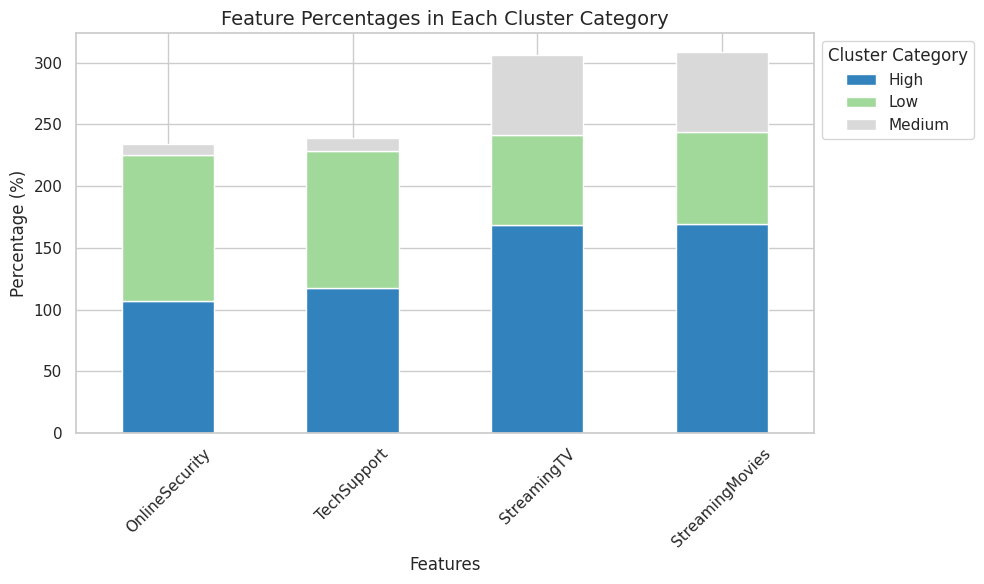

In [ ]:
features_for_clustering = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
feature_percentages = df[features_for_clustering + ['ClusterCategory']].groupby('ClusterCategory').mean() * 100
feature_percentages.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20c")
plt.title("Feature Percentages in Each Cluster Category", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Cluster Category", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

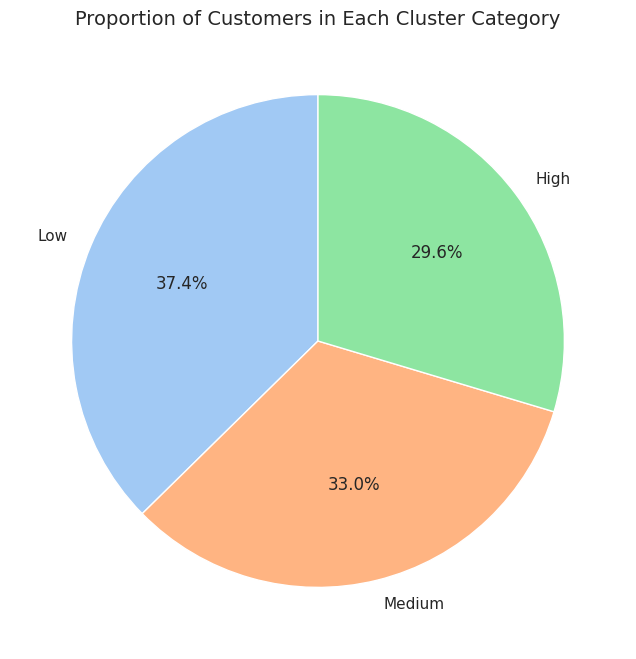

In [ ]:
cluster_proportions = df['ClusterCategory'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
cluster_proportions.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proportion of Customers in Each Cluster Category", fontsize=14)
plt.ylabel("")  # Hide y-label for pie chart
plt.show()

In [ ]:
import pandas as pd

# Assuming df is the original DataFrame with customer data

# Create a sample 'churn_risk_label' based on your criteria (High, Medium, Low)
# This is just an example; you can use your own logic to define the churn risk
#Use df['Cluster'] instead of clusters since clusters is not defined
churn_risk_label = ['High' if x >= 0.7 else 'Medium' if (0.7 > x >= 0.5) else 'Low' for x in df['Cluster']]

# Create a new DataFrame with CustomerID, Churn Risk Label, and Cluster
df_combined = pd.DataFrame({
    'CustomerID': ID,
    'ChurnRiskLabel': churn_risk_label,
    'Cluster': df['Cluster']  # Assuming 'clusters' holds the cluster labels for each customer
})

# Optionally, if you want to check the first few rows of the combined DataFrame:
print(df_combined)

      CustomerID ChurnRiskLabel  Cluster
0     7590-VHVEG           High        1
1     5575-GNVDE           High        2
2     3668-QPYBK           High        2
3     7795-CFOCW           High        2
4     9237-HQITU           High        1
...          ...            ...      ...
7038  6840-RESVB            Low        0
7039  2234-XADUH            Low        0
7040  4801-JZAZL           High        2
7041  8361-LTMKD           High        1
7042  3186-AJIEK            Low        0

[7032 rows x 3 columns]


In [ ]:

def assign_marketing_strategy(row):
    if row['ChurnRiskLabel'] == 'High' and row['Cluster'] == 0:
        return 'Offer retention incentives (discounts, premium offers, etc.)'
    elif row['ChurnRiskLabel'] == 'Medium' and row['Cluster'] == 1:
        return 'Offer mild retention strategies (extended contracts, personalized offers)'
    elif row['ChurnRiskLabel'] == 'Low' and row['Cluster'] == 2:
        return 'Maintain basic engagement (newsletters, customer satisfaction surveys)'
    else:
        return 'Standard engagement (keep regular interactions)'

# Apply the function to the combined DataFrame to create a new column 'MarketingStrategy'
df_combined['MarketingStrategy'] = df_combined.apply(assign_marketing_strategy, axis=1)

# Optionally, view the updated DataFrame with marketing strategies
print(df_combined[['CustomerID', 'ChurnRiskLabel', 'Cluster', 'MarketingStrategy']].head())

# If you want to analyze or visualize the strategies, you can use value counts
print(df_combined['MarketingStrategy'].value_counts())


   CustomerID ChurnRiskLabel  Cluster  \
0  7590-VHVEG           High        1   
1  5575-GNVDE           High        2   
2  3668-QPYBK           High        2   
3  7795-CFOCW           High        2   
4  9237-HQITU           High        1   

                                 MarketingStrategy  
0  Standard engagement (keep regular interactions)  
1  Standard engagement (keep regular interactions)  
2  Standard engagement (keep regular interactions)  
3  Standard engagement (keep regular interactions)  
4  Standard engagement (keep regular interactions)  
MarketingStrategy
Standard engagement (keep regular interactions)    7032
Name: count, dtype: int64


In [ ]:
# Apply the function to the combined DataFrame to create a new column 'MarketingStrategy'
df_combined['MarketingStrategy'] = df_combined.apply(assign_marketing_strategy, axis=1)

# Function to fetch customer info based on Customer ID
def get_customer_info(customer_id):
    customer_info = df_combined[df_combined['CustomerID'] == customer_id]

    if not customer_info.empty:
        return customer_info
    else:
        return f"Customer ID {customer_id} not found."

# Interactive function for marketing strategy
def interactive_marketing():
    print("Enter the Customer ID to get their marketing strategy:")
    customer_id = input("Customer ID: ")

    # Get customer info
    customer_info = get_customer_info(customer_id)

    if isinstance(customer_info, pd.DataFrame):
        print(f"\nCustomer ID: {customer_info['CustomerID'].values[0]}")
        print(f"Churn Risk: {customer_info['ChurnRiskLabel'].values[0]}")
        print(f"Cluster: {customer_info['Cluster'].values[0]}")
        print(f"Marketing Strategy: {customer_info['MarketingStrategy'].values[0]}")
    else:
        print(customer_info)

# Call the function to start the interactive process
interactive_marketing()

Enter the Customer ID to get their marketing strategy:
Customer ID: 9237-HQITU

Customer ID: 9237-HQITU
Churn Risk: High
Cluster: 1
Marketing Strategy: Standard engagement (keep regular interactions)
